In [1]:
import yfinance as yf
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=yf.download("BTC-USD",'2015-01-01','2025-04-15')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [15]:
data=pd.DataFrame(data)

In [5]:
data.reset_index(inplace=True)

In [11]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
1,2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2,2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
3,2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
4,2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800
...,...,...,...,...,...,...
3752,2025-04-10,79626.140625,82700.929688,78456.132812,82565.976562,44718000633
3753,2025-04-11,83404.835938,84247.476562,78936.320312,79625.046875,41656778779
3754,2025-04-12,85287.109375,85856.187500,82769.375000,83404.515625,24258059104


In [6]:
data.drop(columns=['Date','High','Low','Open','Volume'],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13568\851307132.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop(columns=['Date','High','Low','Open','Volume'],inplace=True)


In [7]:
data

Price,Close
Ticker,BTC-USD
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3752,79626.140625
3753,83404.835938
3754,85287.109375


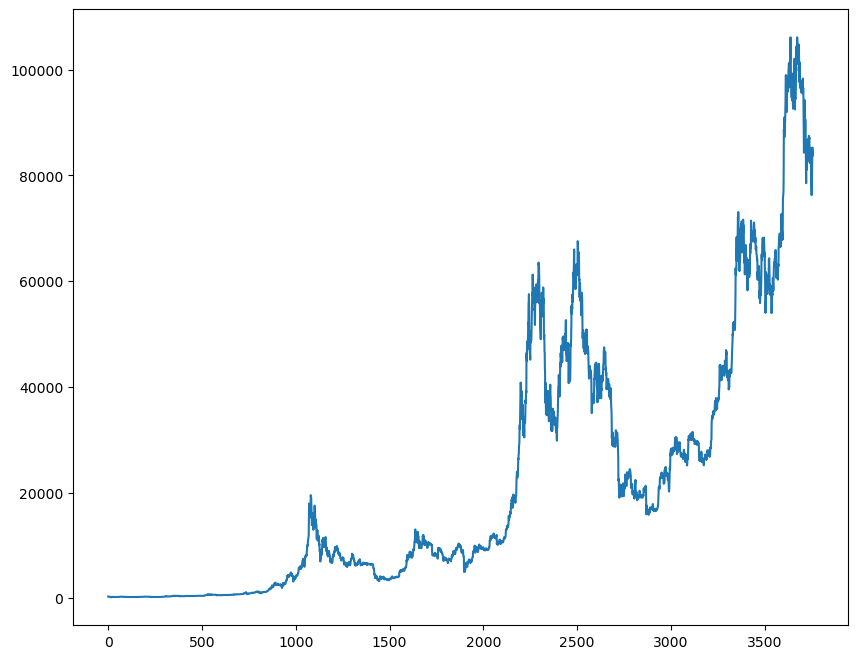

In [8]:
plt.figure(figsize=(10,8))
plt.plot(data)
plt.show()

In [9]:
train_data=data[:-100]
test_data=data[-100:]

In [10]:
train_data.shape

(3657, 1)

In [11]:
test_data.shape

(100, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
train_data_scale=scaler.fit_transform(train_data)

In [15]:
base_days=100

In [16]:
x=[]
y=[]
for i in range(base_days,train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])
    


In [17]:
x,y=np.array(x),np.array(y)

In [33]:
x=np.reshape(x,(x.shape[0],x.shape[1],1))

In [35]:
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential

In [36]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
model.fit(x,y,epochs=50,verbose=1)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - loss: 0.0282
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.0045
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.0037
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.0038
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.0032
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 0.0025
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.0028
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.0027
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0023
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.0023
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0022
Epoch 12/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 0.0022
Epoch 13/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0020
Epoch 14/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0020
Epoch 15/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 

In [47]:
test_data=pd.concat((train_data.tail(100),test_data),ignore_index=True)

In [49]:
test_data

Price,Close
Ticker,BTC-USD
0,65790.664062
1,65887.648438
2,65635.304688
3,63329.500000
4,60837.007812
...,...
195,79626.140625
196,83404.835938
197,85287.109375


In [53]:
test_data_scale=scaler.transform(test_data)

In [55]:
x=[]
y=[]
for i in range(base_days,test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [59]:
x,y=np.array(x),np.array(y)

In [61]:
x=np.reshape(x,(x.shape[0],x.shape[1],1))

In [63]:
pred=model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


In [67]:
pred=scaler.inverse_transform(pred)

In [69]:
pred

array([[91781.36 ],
       [92709.484],
       [93751.18 ],
       [94316.25 ],
       [94116.95 ],
       [93122.56 ],
       [91851.83 ],
       [90733.93 ],
       [90025.96 ],
       [89781.48 ],
       [90079.805],
       [91044.55 ],
       [92351.22 ],
       [94008.984],
       [95686.836],
       [96743.65 ],
       [97112.02 ],
       [97303.3  ],
       [97332.71 ],
       [97283.82 ],
       [97300.29 ],
       [97422.55 ],
       [97459.02 ],
       [97326.43 ],
       [97018.12 ],
       [96838.94 ],
       [96983.6  ],
       [97207.984],
       [97216.28 ],
       [96733.43 ],
       [96173.79 ],
       [95510.71 ],
       [94736.61 ],
       [93963.01 ],
       [93321.414],
       [92890.16 ],
       [92677.81 ],
       [92715.984],
       [92779.445],
       [92937.42 ],
       [93050.9  ],
       [93133.07 ],
       [93185.09 ],
       [93082.98 ],
       [92798.8  ],
       [92390.11 ],
       [92058.664],
       [92043.16 ],
       [92145.055],
       [92269.31 ],


#Future BitCoin Price

In [74]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [76]:
z=np.array(z)
z=scaler.inverse_transform(z.reshape(-1,1))

In [78]:
z

array([[80174.2751654 ],
       [80616.9977996 ],
       [80385.05426395],
       [79677.91827283],
       [78728.61337344],
       [77712.36038894],
       [76730.40250841],
       [75827.57600132],
       [75012.95043844],
       [74278.65626185],
       [73609.48488768],
       [72989.80456963],
       [72405.32883899],
       [71844.22177957],
       [71297.32539859],
       [70758.00804611],
       [70222.22125775],
       [69688.50607051],
       [69156.21826697],
       [68625.38311056],
       [68096.39218442],
       [67569.92760112],
       [67048.12412035],
       [66532.06806952],
       [66022.39735021],
       [65519.68670541],
       [65024.25824383],
       [64536.01722761],
       [64054.62260048],
       [63579.50593529]])

In [80]:
model.save('Bitcoin_Price_Prediction.keras')